In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns

from plotly import graph_objs as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.express as px


In [2]:
# return a dataframe from a file path
def wrangle(fp):
    df = pd.read_csv(fp, low_memory=False)
    return df


In [3]:
"""There 5 initial instruments for Tsepamo
1-Intial tsepamo instrument
2-Outcomes
3-Personal identifiers
4-Imps
5-Switcher Ipms
"""
df = wrangle("../data_input/Tsepamo_DATA_2023-12-01_1436.csv")
print("df shape:", df.shape)
df.head()


df shape: (2175, 2257)


,record_id,site,screen_cl,part_cl,part_cl_bid,placental,placenta_icsigned,placenta_dattimeconsent,placenta_iccopy,placenta_consent_received,...,ntd_twin,ntd_triplet,ntd_quad,ca_majorabn,ca_majorabn_twin,ca_majorabn_triplet,ca_majorabn_quad,ca_reportedmom,followup_ca,tsepamo_complete
0,100100001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,100100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,100100003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,100100004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,100100005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [4]:
# stats
df.describe()


,record_id,site,screen_cl,part_cl,part_cl_bid,placental,placenta_icsigned,placenta_dattimeconsent,placenta_iccopy,placenta_consent_received,...,ntd_twin,ntd_triplet,ntd_quad,ca_majorabn,ca_majorabn_twin,ca_majorabn_triplet,ca_majorabn_quad,ca_reportedmom,followup_ca,tsepamo_complete
count,2.175000e+03,2175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,60.000000,0.0,0.0,0.0,11.000000,0.0,2175.000000
mean,1.001642e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.266667,NaN,NaN,NaN,0.181818,NaN,1.963218
std,4.826315e+04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.338690,NaN,NaN,NaN,0.404520,NaN,0.268782
min,1.001000e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,1.001006e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,2.000000
50%,1.002003e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,2.000000
75%,1.002009e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,NaN,2.000000
max,1.002014e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,1.000000,NaN,2.000000


In [5]:
# EXPLORE: Null values count
# TODO: Drop columns with high null count
df.isnull().sum() / len(df)


record_id              0.000000
site                   0.000000
screen_cl              1.000000
part_cl                1.000000
part_cl_bid            1.000000
                         ...   
ca_majorabn_triplet    1.000000
ca_majorabn_quad       1.000000
ca_reportedmom         0.994943
followup_ca            1.000000
tsepamo_complete       0.000000
Length: 2257, dtype: float64

In [6]:
# subset data based on the datatype : find categorical values for (low,high) cardinality
# high cardinality columns affect the model accuracy / information overload
# low cardinality columns provide no information
# multicollinearity, that is, features in our feature matrix that are highly correlated with each other. A good way to detect this is to use a heatmap
from pprint import pprint
pprint(df.select_dtypes('object').nunique(),depth=2)


ancreg                   384
bookdate                 321
nationalother              6
date_admit1_pregnancy    101
admit1_diag               81
                        ... 
armsdescribe               9
fingerdescribe            19
spinedescribe              1
otherca                    8
caddx                     49
Length: 110, dtype: int64


In [7]:
# #test
# # create a dictionary with five fields each
# data = {
#     'A': ['A1', 'A2', 'A3', 'A4', 'A5'],
#     'B': ['B1', 'B2', 'B3', 'B4', 'B5'],
#     'C': ['C1', 'C2', 'C3', 'C4', 'C5'],
#     'D': ['D1', 'D2', 'D3', 'D4', 'D5'],
#     'E': ['E1', 'E2', 'E3', 'E4', 'E5']}

# # Convert the dictionary into DataFrame
# dfx = pd.DataFrame(data)

# # Remove all columns between column name 'B' to 'D'
# dfx.drop(dfx.iloc[:, 1:3].columns, axis=1, inplace=True)
# dfx


In [8]:
print(f'Total number of records: {len(df)}')


Total number of records: 2175


In [9]:
#  where the initial instrument is complete
mask = df['tsepamo_complete']== 2
print(f'Tsepamo complete instrument total: {len(df[mask])}')


Tsepamo complete instrument total: 2135


In [10]:
# distribution of the data by site
df = df[mask]

print(f'Total number of placental study participants {df["placental"].nunique()}')


Total number of placental study participants 0


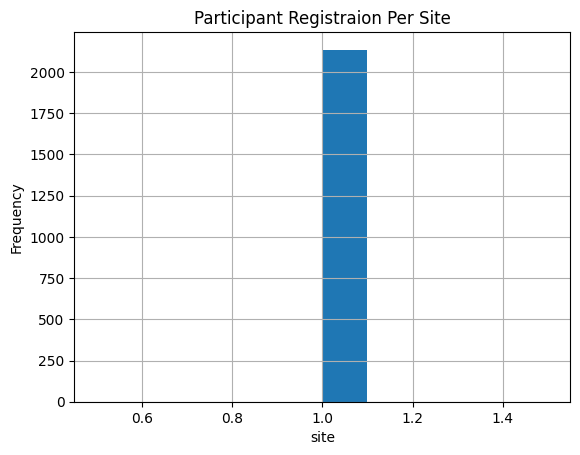

In [11]:
# Site distribution
df.hist(column='site')

plt.title('Participant Registraion Per Site')
plt.xlabel('site')
plt.ylabel('Frequency')

plt.show()


# General Information

In [12]:
# Is the Maternity Card Available?
mask = df['cardavailable'] == 1
df_cards = df[mask]

print(f'Total participants with maternity cards: {len(df_cards)}')


Total participants with maternity cards: 2123


In [13]:
# non bookers
mask_1 = df_cards['nonbooker'] == 1
mask_2 = df_cards['nonbooker'] == 0
nonbookers = df_cards[mask_1]
bookers_df = df_cards[mask_2]

print(f'Total participants did not book: {len(nonbookers)}')
print(f'Total participants that booked: {len(bookers_df)}')

# Compare the age distribution between booked and not booked participants
combined_df = pd.concat([bookers_df, nonbookers])
fig = px.histogram(
    combined_df,
    x='matage',
    color='nonbooker',
    color_discrete_sequence=['blue', 'orange'],
    marginal='box',
    barmode='overlay',
    labels={'matage': 'Age', 'nonbooker': 'Booking Status'},
    title='Age Distribution Comparison between Booked and Not_Booked Participants'
)

# Customize the layout
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency')

# Show the plot
fig.show()


Total participants did not book: 101
Total participants that booked: 2022


In [14]:
# ANC clinic registration
print(f'Total number of ANC registration clinics: {bookers_df.ancreg.nunique()}')


Total number of ANC registration clinics: 380


In [15]:
# plot the distribution of clinics


In [16]:
# Seaborn plot
# plt.figure(figsize=(12, 6))
# sns.countplot(y='ancreg', data=df, order=df['ancreg'].value_counts().head(20).index)
# plt.title('Site Frequency Distribution')
# plt.xlabel('Frequency')
# plt.ylabel('Location')
# plt.show()


In [17]:

location_counts = bookers_df['ancreg'].value_counts()

# Get the top 20 frequencies
top_20_locations = location_counts.head(20)

bar_trace = go.Bar(x=top_20_locations.values[::-1], y=top_20_locations.index[::-1], orientation='h',
                   marker=dict(color='rgba(50, 171, 96, 0.6)'))

# Create layout
layout = go.Layout(title='Top 20 Site Frequencies', xaxis=dict(title='Frequency'),
                   yaxis=dict(title='Location'), showlegend=False, height=600)

# Create the figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the figure
fig.show()


In [18]:
# clinic codes
print(f'Number of unique clinic codes: {bookers_df["cliniccode"].nunique()}')


Number of unique clinic codes: 226


In [19]:
# START: Booking Date at ANC
# change data type to datetime
bookers_df["Date"] = pd.to_datetime(bookers_df["bookdate"])

# Date statistics median, and range of booking dates
bookers_df['Date'].describe()


/var/folders/4g/7fbfj5l501jgcxr54kt140ch0000gp/T/ipykernel_16259/2038799898.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count                             2011
mean     2014-08-24 18:23:27.061163520
min                2014-01-09 00:00:00
25%                2014-06-10 00:00:00
50%                2014-08-18 00:00:00
75%                2014-11-05 00:00:00
max                2015-06-10 00:00:00
Name: Date, dtype: object

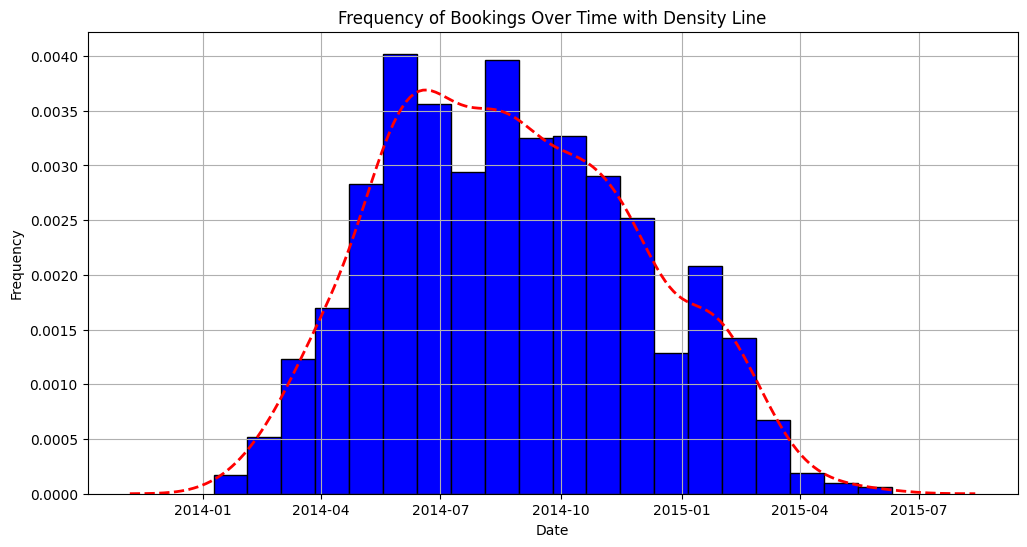

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(bookers_df['Date'], bins=20, color='blue', edgecolor='black', density=True)

# density plot
sns.kdeplot(bookers_df['Date'], color='red', linestyle='dashed', linewidth=2)

# Customize the plot
plt.title('Frequency of Bookings Over Time with Density Line')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


In [21]:
df = bookers_df.sort_values('Date')
fig = go.Figure()
# lineplot frequency
fig.add_trace(go.Scatter(x=df['Date'], y=df.groupby('Date').size(), mode='lines', name='Frequency'))

fig.update_layout(title='Booking Trends Over Time', xaxis_title='Date', yaxis_title='Frequency', height=600)

fig.show()


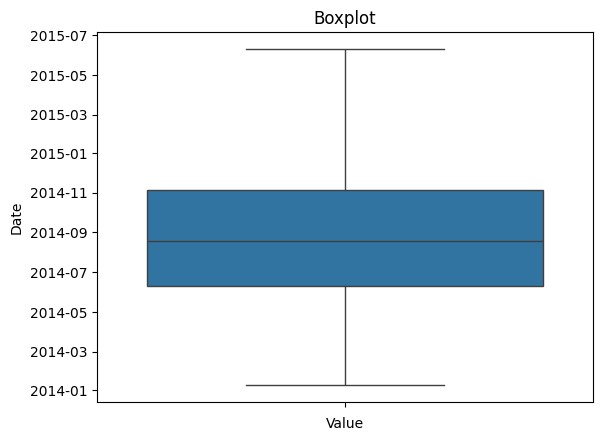

In [22]:
# Boxplot
sns.boxplot(df['Date'])

plt.title('Boxplot')
plt.xlabel('Value')
plt.show()


In [23]:
# END: Booking Date at ANC


In [24]:
#


# Antenatal Section

In [25]:
# START: Age
# Age statistics
df.matage.describe()


count    2019.000000
mean       27.275384
std         6.409501
min        14.000000
25%        22.000000
50%        27.000000
75%        32.000000
max        47.000000
Name: matage, dtype: float64

In [26]:
# unique age count
df.matage.nunique()


33

In [27]:
# Participants without age
df[df['matageunknown']==1][['matage','site','cardavailable','nonbooker','ancreg']]


,matage,site,cardavailable,nonbooker,ancreg
267,NaN,1,1.0,0.0,princess marina hospital
383,NaN,1,1.0,0.0,lotlhakane east
1240,NaN,1,1.0,0.0,lesirane


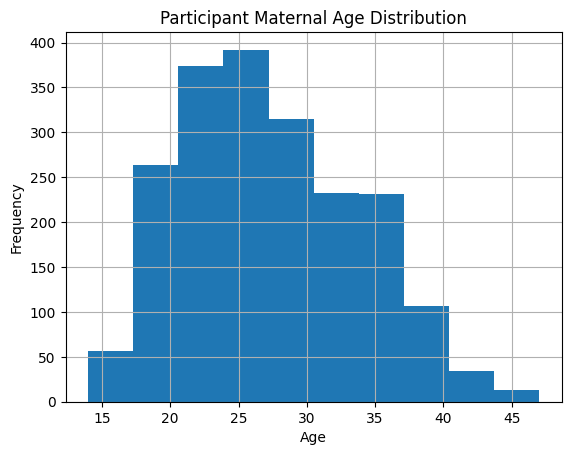

In [28]:
# Age distribution
df.hist(column='matage')

plt.title('Participant Maternal Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the hist
plt.show()


In [29]:
# Group the data by age ranges and analyze booking patterns within each group.

# Define age groups based on age ranges
bins = [14, 20, 30, 40, 60, float('inf')]
age_labels = ['14-20', '21-30', '31-40', '41-60', '61+']

combined_df['age_group'] = pd.cut(combined_df['matage'], bins=bins, labels=age_labels)

age_group_summary = combined_df.groupby(['age_group', 'nonbooker']).size().unstack().fillna(0)
# age_group_summary.plot(kind='bar', stacked=True)
# plt.title('Booking pattern within each Age Group')
# plt.xlabel('Age group')
# plt.ylabel('Participant count')
# plt.show()


/var/folders/4g/7fbfj5l501jgcxr54kt140ch0000gp/T/ipykernel_16259/970403306.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/4g/7fbfj5l501jgcxr54kt140ch0000gp/T/ipykernel_16259/970403306.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [30]:
fig = px.bar(age_group_summary, x=age_group_summary.index, y=[0,1],
             labels={'0': 'Booked', '1':'Not Booked'},
             barmode='stack',
             title='Booking pattern within each Age Group',
             )

fig.update_layout(legend_title_text ='Booking Status')
fig.show()


In [31]:
#END: Age


In [32]:
# Marital Status count Distribution
mask_single = df['maritalstat'] == 1
mask_married = df['maritalstat'] == 2
mask_widowed = df['maritalstat'] == 3
mask_divorced = df['maritalstat'] == 4
mask_unknown = df['maritalstat'] == 99

single = len(df[mask_single])
married = len(df[mask_married])
widowed = len(df[mask_widowed])
divorced = len(df[mask_divorced])
unknown = len(df[mask_unknown])

# Create a DataFrame with the marital status information
marital_status_data = {
    'Marital Status': ['Single', 'Married', 'Widowed', 'Divorced', 'Unknown'],
    'Total Participants': [single, married, widowed, divorced, unknown]
}

marital_status_df = pd.DataFrame(marital_status_data)

fig = px.pie(marital_status_df, names='Marital Status', values='Total Participants',
             title='Distribution of Marital Status among Participants')

fig.show()


In [33]:
# Nationality number of unique values
df.national.nunique()


10

In [34]:
# Nationality set of unique values
df.national.unique()


array([ 1,  2, 13, 10, 99, 11,  9,  3,  4,  6])

In [35]:
# Statistics
df.national.describe()


count    2022.000000
mean        1.445104
std         5.816483
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        99.000000
Name: national, dtype: float64

In [36]:
# Nationality dictionary
nationality_dict = {
    99: 'UNKNOWN',
    1: 'Motswana',
    2: 'Zimbabwean',
    3: 'Kenyan',
    4: 'South African',
    5: 'Chinese',
    6: 'Indian',
    7: 'Congolese',
    8: 'Lesotho',
    9: 'Malawi',
    10: 'Zambia',
    11: 'Tanzania',
    12: 'Nigeria',
    13: 'Other',
    14: 'Pakistani',
    15: 'Bangladeshi',
    16: 'Ghana',
    17: 'Guinean',
    18: 'Ugandan',
    19: 'Somalian',
    20: 'Sierra Leone',
    21: 'Non-citizen (but not specified)',
    22: 'Namibian',
    23: 'Ethiopian'
}


In [37]:
# select values
mask_bw = df['national'] == 1
mask_zim = df['national'] == 2
mask_kenyan = df['national'] == 3
mask_sa = df['national'] == 4
mask_ind = df['national'] == 6
mask_mal = df['national'] == 9
mask_za = df['national'] == 10
mask_tan = df['national'] == 11
mask_other = df['national'] == 13
mask_unknown = df['national'] == 99

bw = len(df[mask_bw])
zim = len(df[mask_zim])
kenya = len(df[mask_kenyan])
sa = len(df[mask_sa])
india = len(df[mask_ind])
malawi = len(df[mask_mal])
zambia = len(df[mask_za])
tan = len(df[mask_tan])
other = len(df[mask_other])
unknown = len(df[mask_unknown])


# Create a DataFrame with the marital status information
nationality_data = {
    'Nationality': [nationality_dict[1],nationality_dict[2], nationality_dict[3], nationality_dict[4], nationality_dict[6], nationality_dict[9], nationality_dict[10], nationality_dict[11], nationality_dict[13], nationality_dict[99]],
    'Total Participants': [bw, zim, kenya, sa, india, malawi, zambia, tan, other, unknown]
}

nationality_df = pd.DataFrame(nationality_data)

fig = px.pie(nationality_df, names='Nationality', values='Total Participants',
             title='Nationality distribution')
fig.show()


In [38]:
# END: Nationality


In [39]:
# START: Education
edu_dict = {
   1: 'Standard/Primary',
   2: 'Secondary or Equivalent',
   3: 'Tertiary or University',
   4: None,
   99: 'Unknown'
}


In [40]:
df.educ.unique()


array([ 3,  2, 99,  1,  4])

In [41]:
primary = df['educ'] == 1
sec = df['educ'] == 2
uni = df['educ'] == 3
none_values = df['educ'] == 4
unknown = df['educ'] == 99


primary_count = len(df[primary])
sec_count = len(df[sec])
uni_count = len(df[uni])
none_count = len(df[none_values])
unknown_count = len(df[unknown])

# Create a DataFrame with the marital status information
edu_data = {
    'Education': [edu_dict[1],edu_dict[2], edu_dict[3], edu_dict[4], edu_dict[99]],
    'Total Participants': [primary_count, sec_count, uni_count, none_count, unknown_count ]
}

edu_df = pd.DataFrame(edu_data)

fig = px.pie(edu_df, names='Education', values='Total Participants',
             title='Pregnant Participant Education distribution')
fig.show()


In [42]:
# END: Education


In [43]:
# START: Occupation
occup_dict = {
    1: 'Student',
    2: 'Housewife or None',
    3: 'Salaried',
    99: 'Unknown'
}


In [44]:
df.occup.unique()


array([ 2,  3,  1, 99])

In [45]:
student = len(df[df['occup'] == 1])
wife_none = len(df[df['occup'] == 2])
salaried = len(df[df['occup'] == 3])
unknown = len(df[df['occup'] == 99])

# Create a DataFrame with the marital status information
occup_data = {
    'Occupation': [occup_dict[1],occup_dict[2], occup_dict[3], occup_dict[99]],
    'Total Participants': [student, wife_none, salaried, unknown ]
}

occup_df = pd.DataFrame(occup_data)

fig = px.pie(occup_df, names='Occupation', values='Total Participants',
             title='Pregnant Participant Occupation distribution')
fig.show()


In [46]:
# END: Occupation


In [47]:
# education vs occupation
"""
Is there a correlation between education and occupation
"""


'\nIs there a correlation between education and occupation\n'

In [48]:
# START: Obsteric History


# Past obsteric history
Obsteric history consists of history of preeclampsia/eclampsia, history of abortion, parity, pregnancy plan and gestational distance
- Preeclampsia is a complication of pregnancy. With preeclampsia, you might have high blood pressure, high levels of protein in urine that indicate kidney damage (proteinuria), or other signs of organ damage. (Although the exact cause of pre-eclampsia is not known, it's thought to occur when there's a problem with the placenta)
- Eclampsia is the new onset of seizures or coma in a pregnant woman with preeclampsia


## Gravida
- The number of times a patient has been pregnant, inclusive of the current pregnancy

## Para
- The number of times a partient has give birth to a viable child or for at least 20 weeks based on the gestational period

## Nullparity
- A nulliparous female (a nullipara or para 0) has never given birth.

In [49]:
"""
Distribution of Gravida and Para
Relationship between Gravida and Para (scatter plot)
Pregnancy Status Analysis: (Categorize participants into pregnancy status based on gravida and para.
Use a bar chart to visualize the count of participants in each pregnancy status category.)
NOTE: Past Obstetric History - check is the gravida > para does the participant have a history of stillbirth
"""


'\nDistribution of Gravida and Para\nRelationship between Gravida and Para (scatter plot)\nPregnancy Status Analysis: (Categorize participants into pregnancy status based on gravida and para.\nUse a bar chart to visualize the count of participants in each pregnancy status category.)\nNOTE: Past Obstetric History - check is the gravida > para does the participant have a history of stillbirth\n'

In [50]:
len(df)


2022

In [51]:
df.grav.unique()


array([ 2.,  1.,  4.,  3.,  5.,  6.,  7.,  9., nan,  8.])

In [52]:
print(f'Total number of participants with G1+: {df.grav.notnull().sum()}')


Total number of participants with G1+: 2018


In [53]:
print(f'Total number of participants with G unknown: {df.gravmissing.notnull().sum()}')


Total number of participants with G unknown: 4


In [54]:
print(f'Total number of participants with P1+: {df.para.notnull().sum()}')


Total number of participants with P1+: 2017


In [55]:
print(f'Total number of participants with P unknown: {df.paramissing.notnull().sum()}')


Total number of participants with P unknown: 5


In [56]:
df.grav.head(10)


853    2.0
103    2.0
36     1.0
54     4.0
53     1.0
49     3.0
57     1.0
14     1.0
40     2.0
61     2.0
Name: grav, dtype: float64

In [57]:
df.para.head(10)


853    1.0
103    1.0
36     0.0
54     1.0
53     0.0
49     2.0
57     0.0
14     0.0
40     0.0
61     1.0
Name: para, dtype: float64

In [58]:
# replacing missing values for G,P with 0
df['gravida_'] = df['grav'].fillna(0)
df['para_'] = df['para'].fillna(0)

# relationship between gravida and para
fig3 = px.scatter(df, x='gravida_', y='para_', trendline='ols',title='Relationship between gravida and para')
fig3.show()


In [59]:
# plt.figure(figsize=(10, 6))
# sns.regplot(x='gravida_', y='para_', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# # Customize the plot
# plt.title('Relationship between Gravida and Para with Trendline')
# plt.xlabel('Gravida')
# plt.ylabel('Para')

# # Show the plot
# plt.show()


In [60]:
fig1 = px.histogram(df, x='gravida_', title='Distribution of Gravida')
fig2 = px.histogram(df, x='para_', title='Distribution of Para')

fig1.show()
fig2.show()


In [61]:
# This visualization helps analyze and compare the distribution of pregnant and not pregnant participants based on the conditions defined by 'gravida' and 'para'.
df['pregnancy_status'] = np.where((df['gravida_'] > 0) & (df['para_'] > 0), 'Pregnant', 'Not Pregnant')
fig4 = px.bar(df, x='pregnancy_status', title='Pregnancy Status Analysis')
fig4.show()


In [62]:
# hx_preterm and hx_stillbirth analysis
hx_preterm = df[df['hx_preterm']== 1]
print(f'History of Preterm Delivery (36 weeks or Less) in previous pregnancies: {len(hx_preterm)}')


History of Preterm Delivery (36 weeks or Less) in previous pregnancies: 60


In [63]:
# hx_preterm and hx_stillbirth analysis
hx_stillbirth = df[df['hx_stillbirth']== 1]
print(f'History of Stillbirth (FSB/MSB) in previous pregnancies?: {len(hx_stillbirth)}')


History of Stillbirth (FSB/MSB) in previous pregnancies?: 18


In [64]:
# END: Obsteric History


In [65]:
# START: Admissions during pregnancy


# Admissions during pregnancy
Was the patient admitted during this pregnancy and discharged before delivery?
- Yes -> 
 - How many times was the patient admitted during this pregnancy
 - What was the date of the first admission
 - Was the date of the first admission UNKNOWN
 - What was the diagnosis during the first admission and other admissions


Diagnosis

-PID - Pelvic Inflammatory Disease - treatment (single dose of intramuscular ceftriaxone or cefoxitin, twice-daily dosing of oral doxycycline, with or without metronidazole)
- Criteria - Minimum criteria for clinical diagnosis are lower abdominal pain, bilateral adnexal tenderness, cervical motion tenderness. Severe cases require oral temperature 38.3 Centigrade, abnormal cervical or vaginal discharge, elevated erythrocyte sedimentation rate and/or C-reactive protein, culture for N.

-Anaemia - Occurs when there isn’t enough haemoglobin in the body to carry oxygen to the organs and tissues. (can be caused by poor nutrition, infections, chronic diseases, heavy menstruation, pregnancy issues and family history. It is often caused by a lack of iron in the blood)
- Treatment - Iron suppliments, Vitamin B12.
https://my.clevelandclinic.org/health/diseases/3929-anemia

-Chronic HRN - Chronic Hypertension is the term for having high blood pressure and increases your risk for heart attack, stroke, heart failure, or kidney disease.
- Criteria - Too much salt. Not enough exercise. Drinking too much alcohol or coffee (or other caffeine-based drinks) and smoking.
- Types: Essential Hypertension, Secondary Hypertension, Resistant Hypertension, Isolated Systolic Hypertension, Malignant Hypertension
- Treatment - BP-lowering medications. healthy living.
 1. Water pills (diuretics). These drugs help remove sodium and water from the body,
 2. Angiotensin-converting enzyme (ACE) inhibitors. These drugs help relax blood vessels. 
 3. Angiotensin II receptor blockers (ARBs).
 4. Calcium channel blockers.


In [66]:
df.admit_pregnancy.shape


(2022,)

In [67]:
df.admit_pregnancy.isnull().sum()


2

In [68]:
# Assumption: admitted during pregnancy and not discharged before delivery
print(f"Participant admitted and not discharged before delivery: {len(df[df['admit_pregnancy']== 0])}")


Participant admitted and not discharged before delivery: 1895


In [69]:
mask_discharged = df['admit_pregnancy']== 1
print(f"Participant admitted during pregnancy and discharged before delivery: {len(df[mask_discharged])}")


Participant admitted during pregnancy and discharged before delivery: 125


In [70]:
mask_discharged = df['admit_pregnancy']== 1
mask_admitted = df['admit_pregnancy']== 0

discharged = df[mask_discharged]
admitted = df[mask_admitted]

combined_df = pd.concat([discharged, admitted])
fig = px.histogram(
    combined_df,
    x='admit_pregnancy',
    color='admit_pregnancy',
    color_discrete_sequence=['blue', 'orange'],
    marginal='box',
    barmode='overlay',
    labels={'admit_pregnancy': 'Admission'},
    title='Discharge Before Delivery In Comparison with Admissions till Delivery'
)

# Customize the layout
fig.update_layout(xaxis_title='Admission', yaxis_title='Frequency')

# Show the plot
fig.show()


In [71]:
# analyse those that are dischared
"""
based on the number of admissions a participant has
- what was the date of the first admission
- was the data of first admission UNKNOWN
- what was the diagnosis during (x) admission
"""
# discharged[['number_admit_pregnancy','date_admit1_pregnancy','date_admit1_unknown','admit1_diag','ancreg']]


'\nbased on the number of admissions a participant has\n- what was the date of the first admission\n- was the data of first admission UNKNOWN\n- what was the diagnosis during (x) admission\n'

In [72]:
discharged.number_admit_pregnancy.unique()


array([2., 1., 3.])

In [73]:
# get data for participant with 1
mask_admitted_1 = discharged['number_admit_pregnancy'] == 1
mask_admitted_2 = discharged['number_admit_pregnancy'] == 2
mask_admitted_3 = discharged['number_admit_pregnancy'] == 3

admitted_once = discharged[mask_admitted_1]
admitted_twice = discharged[mask_admitted_2]
admitted_three = discharged[mask_admitted_3]


combined_df = pd.concat([admitted_once, admitted_twice, admitted_three])
fig = px.histogram(
    combined_df,
    x='number_admit_pregnancy',
    color='number_admit_pregnancy',
    color_discrete_sequence=['blue', 'orange'],
    marginal='box',
    barmode='overlay',
    labels={'number_admit_pregnancy': 'Admission Count'},
    title='Admissions Counts for Discharged Participants'
)

# Customize the layout
fig.update_layout(xaxis_title='Admission', yaxis_title='Frequency')

# Show the plot
fig.show()


In [74]:
# Admissions before discharge proportions

admitted_once = len(discharged[mask_admitted_1])
admitted_twice = len(discharged[mask_admitted_2])
admitted_three = len(discharged[mask_admitted_3])

admission_data = {
    'Admissions Frequency': ['1', '2', '3'],
    '%': [admitted_once, admitted_twice, admitted_three]
}

admission_data_df = pd.DataFrame(admission_data)

fig = px.pie(admission_data_df, names='Admissions Frequency', values='%',
             title='Admissions Frequency Before Discharge Proportions')
fig.show()


In [75]:
# reasons for discharge
# those that were admitted three times before discharge

admitted_three = discharged[mask_admitted_3]

mask = ['number_admit_pregnancy',
        'date_admit1_pregnancy',
        'date_admit1_unknown',
        'admit1_diag',
        'date_admit2_pregnancy',
        'date_admit2_unknown',
        'admit2_diag',
        'date_admit3_pregnancy',
        'date_admit3_unknown',
        'admit3_diag',
        'ancreg',

        ]

df_discharged = admitted_three[mask].dropna(axis=1, how='all')


In [76]:
# TODO: clean diagnosis
# diagnosis value counts for the first admission

df_discharged['admit1_diag'].value_counts()


admit1_diag
PID            1
Chronic HTN    1
Name: count, dtype: int64

In [77]:
# diagnosis value counts for the second admission
df_discharged['admit2_diag'].value_counts()


admit2_diag
mild anaemia    1
Chonic HTN      1
Name: count, dtype: int64

In [78]:
# diagnosis value counts for the third admission
df_discharged['admit3_diag'].value_counts()


admit3_diag
PID    1
PIH    1
Name: count, dtype: int64

In [79]:
# diagnosis value counts for the third admission
df_discharged[['admit1_diag','admit2_diag','admit3_diag']].value_counts()


admit1_diag  admit2_diag   admit3_diag
Chronic HTN  Chonic HTN    PIH            1
PID          mild anaemia  PID            1
Name: count, dtype: int64

In [80]:

data = {'visit_1': df_discharged['admit1_diag'],
        'visit_2': df_discharged['admit2_diag'],
        'visit_3': df_discharged['admit3_diag']}

# Flatten the data
flat_data = [(visit, diagnosis) for visit, diagnoses in data.items() for diagnosis in diagnoses]

df_diag = pd.DataFrame(flat_data, columns=['Visit', 'Diagnosis'])

fig = px.histogram(df_diag, x='Diagnosis', title='Diagnosis Frequency', labels={'Diagnosis': 'Diagnosis', 'count': 'Count'})

fig.show()


In [81]:
# END: Admissions during pregnancy


In [82]:
# START: Medical History before pregnancy


## Medical History before pregnancy:

branch variables
- TB
- Epilepsy
- High BP (hypertension, high blood pressure, elevated BP but NOT PIH or Gestational Hypertension)
- Cancer
- Other


In [83]:
# filtering by Nationality == Botswana
df_med_hist = df[mask_bw]


In [84]:
# medical history dictionary
med_hist_dict = {
'anymedhist___1': 'Cardiac',
'anymedhist___2': 'Renal',
'anymedhist___3': 'STD',
'anymedhist___4': 'TB',
'anymedhist___5': 'Diabetes',
'anymedhist___6': 'Epilepsy',
'anymedhist___7': 'Anemia',
'anymedhist___8': 'High BP (but NOT PIH or Gestational Hypertension)',
'anymedhist___15': 'PIH/Gestational Hypertension',
'anymedhist___18': 'Pre-eclampsia/Eclampsia',
'anymedhist___9': 'Hypothyroidism',
'anymedhist___10': 'Asthma',
'anymedhist___11': 'Cancer',
'anymedhist___12': 'Psychiatric Illness',
'anymedhist___13': 'Other',
'anymedhist___14': 'ulcer/abdominal ulcer/peptic ulcer/gastritis',
'anymedhist___16': 'Migraine/severe headache',
'anymedhist___17': 'DVT (Deep Vein Thrombosis)',
'anymedhist___19': 'Genital warts/warts',
'anymedhist___20': 'Fibroids/fibroid uterus',
'anymedhist___21': 'Backache/Waist ache/ chronic back pain',
'anymedhist___0': 'NONE',
'anymedhist___99': 'UNKNOWN'
}


In [85]:
# create filters

cardiac_count = len(df_med_hist[df_med_hist['anymedhist___1'] == 1])
renal_count = len(df_med_hist[df_med_hist['anymedhist___2'] == 1])
std_count = len(df_med_hist[df_med_hist['anymedhist___3'] == 1])
tb_count = len(df_med_hist[df_med_hist['anymedhist___4'] == 1])
diabetes_count = len(df_med_hist[df_med_hist['anymedhist___5'] == 1])
epilepys_count = len(df_med_hist[df_med_hist['anymedhist___6'] == 1])
anemia_count = len(df_med_hist[df_med_hist['anymedhist___7'] == 1])
bp_count = len(df_med_hist[df_med_hist['anymedhist___8'] == 1])

hypothy_count = len(df_med_hist[df_med_hist['anymedhist___9'] == 1])
asthma_count = len(df_med_hist[df_med_hist['anymedhist___10'] == 1])
cancer_count = len(df_med_hist[df_med_hist['anymedhist___11'] == 1])
psyc_count = len(df_med_hist[df_med_hist['anymedhist___12'] == 1])
other_count = len(df_med_hist[df_med_hist['anymedhist___13'] == 1])
ulcer_count = len(df_med_hist[df_med_hist['anymedhist___15'] == 1])


pih_count = len(df_med_hist[df_med_hist['anymedhist___15'] == 1])
headache_count = len(df_med_hist[df_med_hist['anymedhist___16'] == 1])
dvt_count = len(df_med_hist[df_med_hist['anymedhist___17'] == 1])
eclampsia_count = len(df_med_hist[df_med_hist['anymedhist___18'] == 1])
warts_count = len(df_med_hist[df_med_hist['anymedhist___19'] == 1])
fibroid_count = len(df_med_hist[df_med_hist['anymedhist___20'] == 1])
backpain_count = len(df_med_hist[df_med_hist['anymedhist___21'] == 1])
unknown_count = len(df_med_hist[df_med_hist['anymedhist___99'] == 1])
none_count = len(df_med_hist[df_med_hist['anymedhist___0'] == 1])


In [86]:
med_hist_count_dict = {
    'Medical History':[med_hist_dict['anymedhist___1'],
                       med_hist_dict['anymedhist___2'],
                       med_hist_dict['anymedhist___3'],
                       med_hist_dict['anymedhist___4'],
                       med_hist_dict['anymedhist___5'],
                       med_hist_dict['anymedhist___6'],
                       med_hist_dict['anymedhist___7'],
                       med_hist_dict['anymedhist___8'],
                       med_hist_dict['anymedhist___9'],
                       med_hist_dict['anymedhist___10'],
                       med_hist_dict['anymedhist___11'],
                       med_hist_dict['anymedhist___12'],
                       med_hist_dict['anymedhist___13'],
                       med_hist_dict['anymedhist___14'],
                       med_hist_dict['anymedhist___15'],
                       med_hist_dict['anymedhist___16'],
                       med_hist_dict['anymedhist___17'],
                       med_hist_dict['anymedhist___18'],
                       med_hist_dict['anymedhist___19'],
                       med_hist_dict['anymedhist___20'],
                       med_hist_dict['anymedhist___21'],
                       med_hist_dict['anymedhist___99'],
                       med_hist_dict['anymedhist___0']],
    'Count':[cardiac_count,renal_count,std_count,tb_count,diabetes_count,epilepys_count,anemia_count,bp_count,
             hypothy_count,asthma_count,cancer_count,psyc_count,other_count,ulcer_count,
             pih_count,headache_count,dvt_count,eclampsia_count,
             warts_count,fibroid_count,backpain_count,unknown_count,none_count]
}

med_hist_df = pd.DataFrame(med_hist_count_dict)

fig = px.pie(med_hist_df, names='Medical History', values='Count', title='Medical History before Pregnancy')

fig.show()


In [87]:
# participants with other medical history


In [88]:
# med history of participant admitted and discharged 1 time

# discharged = df[df['admit_pregnancy']== 1]

# admitted once : Botswana participants
a_once = discharged[mask_admitted_1]

cardiac_count = len(a_once[a_once['anymedhist___1'] == 1])
renal_count = len(a_once[a_once['anymedhist___2'] == 1])
std_count = len(a_once[a_once['anymedhist___3'] == 1])
tb_count = len(a_once[a_once['anymedhist___4'] == 1])
diabetes_count = len(a_once[a_once['anymedhist___5'] == 1])
epilepys_count = len(a_once[a_once['anymedhist___6'] == 1])
anemia_count = len(a_once[a_once['anymedhist___7'] == 1])
bp_count = len(a_once[a_once['anymedhist___8'] == 1])

hypothy_count = len(a_once[a_once['anymedhist___9'] == 1])
asthma_count = len(a_once[a_once['anymedhist___10'] == 1])
cancer_count = len(a_once[a_once['anymedhist___11'] == 1])
psyc_count = len(a_once[a_once['anymedhist___12'] == 1])
other_count = len(a_once[a_once['anymedhist___13'] == 1])
ulcer_count = len(a_once[a_once['anymedhist___15'] == 1])


pih_count = len(a_once[a_once['anymedhist___15'] == 1])
headache_count = len(a_once[a_once['anymedhist___16'] == 1])
dvt_count = len(a_once[a_once['anymedhist___17'] == 1])
eclampsia_count = len(a_once[a_once['anymedhist___18'] == 1])
warts_count = len(a_once[a_once['anymedhist___19'] == 1])
fibroid_count = len(a_once[a_once['anymedhist___20'] == 1])
backpain_count = len(a_once[a_once['anymedhist___21'] == 1])
unknown_count = len(a_once[a_once['anymedhist___99'] == 1])
none_count = len(a_once[a_once['anymedhist___0'] == 1])


In [89]:
med_hist_ds_count_dict = {
    'Medical History':[med_hist_dict['anymedhist___1'],
                       med_hist_dict['anymedhist___2'],
                       med_hist_dict['anymedhist___3'],
                       med_hist_dict['anymedhist___4'],
                       med_hist_dict['anymedhist___5'],
                       med_hist_dict['anymedhist___6'],
                       med_hist_dict['anymedhist___7'],
                       med_hist_dict['anymedhist___8'],
                       med_hist_dict['anymedhist___9'],
                       med_hist_dict['anymedhist___10'],
                       med_hist_dict['anymedhist___11'],
                       med_hist_dict['anymedhist___12'],
                       med_hist_dict['anymedhist___13'],
                       med_hist_dict['anymedhist___14'],
                       med_hist_dict['anymedhist___15'],
                       med_hist_dict['anymedhist___16'],
                       med_hist_dict['anymedhist___17'],
                       med_hist_dict['anymedhist___18'],
                       med_hist_dict['anymedhist___19'],
                       med_hist_dict['anymedhist___20'],
                       med_hist_dict['anymedhist___21'],
                       med_hist_dict['anymedhist___99'],
                       med_hist_dict['anymedhist___0']],

    'Count':[cardiac_count,renal_count,std_count,tb_count,diabetes_count,epilepys_count,anemia_count,bp_count,
             hypothy_count,asthma_count,cancer_count,psyc_count,other_count,ulcer_count,
             pih_count,headache_count,dvt_count,eclampsia_count,
             warts_count,fibroid_count,backpain_count,unknown_count,none_count]
}

med_hist_df = pd.DataFrame(med_hist_ds_count_dict)

fig = px.pie(med_hist_df, names='Medical History', values='Count', title='Medical History before Pregnancy for discharged participants with One admission')

fig.show()


In [90]:
# discharged twice
a_twice = discharged[mask_admitted_2]


cardiac_count = len(a_twice[a_twice['anymedhist___1'] == 1])
renal_count = len(a_twice[a_twice['anymedhist___2'] == 1])
std_count = len(a_twice[a_twice['anymedhist___3'] == 1])
tb_count = len(a_twice[a_twice['anymedhist___4'] == 1])
diabetes_count = len(a_twice[a_twice['anymedhist___5'] == 1])
epilepys_count = len(a_twice[a_twice['anymedhist___6'] == 1])
anemia_count = len(a_twice[a_twice['anymedhist___7'] == 1])
bp_count = len(a_twice[a_twice['anymedhist___8'] == 1])

hypothy_count = len(a_twice[a_twice['anymedhist___9'] == 1])
asthma_count = len(a_twice[a_twice['anymedhist___10'] == 1])
cancer_count = len(a_twice[a_twice['anymedhist___11'] == 1])
psyc_count = len(a_twice[a_twice['anymedhist___12'] == 1])
other_count = len(a_twice[a_twice['anymedhist___13'] == 1])
ulcer_count = len(a_twice[a_twice['anymedhist___15'] == 1])


pih_count = len(a_twice[a_twice['anymedhist___15'] == 1])
headache_count = len(a_twice[a_twice['anymedhist___16'] == 1])
dvt_count = len(a_twice[a_twice['anymedhist___17'] == 1])
eclampsia_count = len(a_twice[a_twice['anymedhist___18'] == 1])
warts_count = len(a_twice[a_twice['anymedhist___19'] == 1])
fibroid_count = len(a_twice[a_twice['anymedhist___20'] == 1])
backpain_count = len(a_twice[a_twice['anymedhist___21'] == 1])
unknown_count = len(a_twice[a_twice['anymedhist___99'] == 1])
none_count = len(a_twice[a_twice['anymedhist___0'] == 1])

med_hist_ds_count_dict = {
    'Medical History':[med_hist_dict['anymedhist___1'],
                       med_hist_dict['anymedhist___2'],
                       med_hist_dict['anymedhist___3'],
                       med_hist_dict['anymedhist___4'],
                       med_hist_dict['anymedhist___5'],
                       med_hist_dict['anymedhist___6'],
                       med_hist_dict['anymedhist___7'],
                       med_hist_dict['anymedhist___8'],
                       med_hist_dict['anymedhist___9'],
                       med_hist_dict['anymedhist___10'],
                       med_hist_dict['anymedhist___11'],
                       med_hist_dict['anymedhist___12'],
                       med_hist_dict['anymedhist___13'],
                       med_hist_dict['anymedhist___14'],
                       med_hist_dict['anymedhist___15'],
                       med_hist_dict['anymedhist___16'],
                       med_hist_dict['anymedhist___17'],
                       med_hist_dict['anymedhist___18'],
                       med_hist_dict['anymedhist___19'],
                       med_hist_dict['anymedhist___20'],
                       med_hist_dict['anymedhist___21'],
                       med_hist_dict['anymedhist___99'],
                       med_hist_dict['anymedhist___0']],

    'Count':[cardiac_count,renal_count,std_count,tb_count,diabetes_count,epilepys_count,anemia_count,bp_count,
             hypothy_count,asthma_count,cancer_count,psyc_count,other_count,ulcer_count,
             pih_count,headache_count,dvt_count,eclampsia_count,
             warts_count,fibroid_count,backpain_count,unknown_count,none_count]
}

med_hist_df = pd.DataFrame(med_hist_ds_count_dict)

fig = px.pie(med_hist_df, names='Medical History', values='Count', title='Medical History before Pregnancy for discharged participants with Two admissions')

fig.show()


In [91]:
# discharged 3 times
a_three = discharged[mask_admitted_3]

cardiac_count = len(a_three[a_three['anymedhist___1'] == 1])
renal_count = len(a_three[a_three['anymedhist___2'] == 1])
std_count = len(a_three[a_three['anymedhist___3'] == 1])
tb_count = len(a_three[a_three['anymedhist___4'] == 1])
diabetes_count = len(a_three[a_three['anymedhist___5'] == 1])
epilepys_count = len(a_three[a_three['anymedhist___6'] == 1])
anemia_count = len(a_three[a_three['anymedhist___7'] == 1])
bp_count = len(a_three[a_three['anymedhist___8'] == 1])

hypothy_count = len(a_three[a_three['anymedhist___9'] == 1])
asthma_count = len(a_three[a_three['anymedhist___10'] == 1])
cancer_count = len(a_three[a_three['anymedhist___11'] == 1])
psyc_count = len(a_three[a_three['anymedhist___12'] == 1])
other_count = len(a_three[a_three['anymedhist___13'] == 1])
ulcer_count = len(a_three[a_three['anymedhist___15'] == 1])


pih_count = len(a_three[a_three['anymedhist___15'] == 1])
headache_count = len(a_three[a_three['anymedhist___16'] == 1])
dvt_count = len(a_three[a_three['anymedhist___17'] == 1])
eclampsia_count = len(a_three[a_three['anymedhist___18'] == 1])
warts_count = len(a_three[a_three['anymedhist___19'] == 1])
fibroid_count = len(a_three[a_three['anymedhist___20'] == 1])
backpain_count = len(a_three[a_three['anymedhist___21'] == 1])
unknown_count = len(a_three[a_three['anymedhist___99'] == 1])
none_count = len(a_three[a_three['anymedhist___0'] == 1])

med_hist_ds_count_dict = {
    'Medical History':[med_hist_dict['anymedhist___1'],
                       med_hist_dict['anymedhist___2'],
                       med_hist_dict['anymedhist___3'],
                       med_hist_dict['anymedhist___4'],
                       med_hist_dict['anymedhist___5'],
                       med_hist_dict['anymedhist___6'],
                       med_hist_dict['anymedhist___7'],
                       med_hist_dict['anymedhist___8'],
                       med_hist_dict['anymedhist___9'],
                       med_hist_dict['anymedhist___10'],
                       med_hist_dict['anymedhist___11'],
                       med_hist_dict['anymedhist___12'],
                       med_hist_dict['anymedhist___13'],
                       med_hist_dict['anymedhist___14'],
                       med_hist_dict['anymedhist___15'],
                       med_hist_dict['anymedhist___16'],
                       med_hist_dict['anymedhist___17'],
                       med_hist_dict['anymedhist___18'],
                       med_hist_dict['anymedhist___19'],
                       med_hist_dict['anymedhist___20'],
                       med_hist_dict['anymedhist___21'],
                       med_hist_dict['anymedhist___99'],
                       med_hist_dict['anymedhist___0']],

    'Count':[cardiac_count,renal_count,std_count,tb_count,diabetes_count,epilepys_count,anemia_count,bp_count,
             hypothy_count,asthma_count,cancer_count,psyc_count,other_count,ulcer_count,
             pih_count,headache_count,dvt_count,eclampsia_count,
             warts_count,fibroid_count,backpain_count,unknown_count,none_count]
}

med_hist_df = pd.DataFrame(med_hist_ds_count_dict)

fig = px.pie(med_hist_df, names='Medical History', values='Count', title='Medical History before Pregnancy for discharged participants with Three admissions')

fig.show()


In [92]:
# find out the pregnancy outcome
a_three


,record_id,site,screen_cl,part_cl,part_cl_bid,placental,placenta_icsigned,placenta_dattimeconsent,placenta_iccopy,placenta_consent_received,...,ca_majorabn_twin,ca_majorabn_triplet,ca_majorabn_quad,ca_reportedmom,followup_ca,tsepamo_complete,Date,gravida_,para_,pregnancy_status
503,100100511,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-04-14,1.0,0.0,Not Pregnant
518,100100526,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-07-08,2.0,2.0,Pregnant


In [93]:
# END: Medical History before pregnancy

discharged = df[mask_discharged]


mask_med_hist_other = discharged[discharged['anymedhist___13'] == 1]


In [94]:
print(f'Discharged participants with other medical history count: {len(mask_med_hist_other)}')


Discharged participants with other medical history count: 2


In [95]:
list(mask_med_hist_other['othermedhistsp'])


['2nd degree heart block type 1', 'allegic to pollen']

In [96]:
# Participants with prior medical history: branches

med_hist_tb = df[mask_bw]

# tb
tb_count = len(med_hist_tb[med_hist_tb['anymedhist___4'] == 1])

# epilepsy
epilepys_count = len(med_hist_tb[med_hist_tb['anymedhist___6'] == 1])

# high bp
bp_count = len(med_hist_tb[med_hist_tb['anymedhist___8'] == 1])

# cancer bp
cancer_count = len(med_hist_tb[med_hist_tb['anymedhist___11'] == 1])



print(f'All participants with prior TB medical history count: {tb_count}')
print(f'All participants with prior Epilepsy medical history count: {epilepys_count}')
print(f'All participants with prior High BP medical history count: {bp_count}')
print(f'All participants with prior Cancer medical history count: {cancer_count}')


All participants with prior TB medical history count: 9
All participants with prior Epilepsy medical history count: 4
All participants with prior High BP medical history count: 65
All participants with prior Cancer medical history count: 0


In [97]:
"""
TB exploration
Was this woman on anti-TB medication at any time during THIS pregnancy?
-key branches
HIV information
Clinical information

-Key comparisons
Pregnacy risk
Laboratory information

--Missing data
-taking anti-TB medication during pregnancy
-tb_treatment, tbtreat_date, tb_meds


"""
tb_df = med_hist_tb[med_hist_tb['anymedhist___4'] == 1]


In [98]:
tb_df.head()


,record_id,site,screen_cl,part_cl,part_cl_bid,placental,placenta_icsigned,placenta_dattimeconsent,placenta_iccopy,placenta_consent_received,...,ca_majorabn_twin,ca_majorabn_triplet,ca_majorabn_quad,ca_reportedmom,followup_ca,tsepamo_complete,Date,gravida_,para_,pregnancy_status
344,100100349,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-05-15,2.0,0.0,Not Pregnant
268,100100273,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-05-26,4.0,3.0,Pregnant
781,100100790,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-06-17,2.0,1.0,Pregnant
684,100100693,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-06-30,1.0,0.0,Not Pregnant
271,100100276,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-07-09,2.0,1.0,Pregnant


In [99]:
# anti-TB medication during pregnancy
# NOTE: This should not have NaN
tb_df[['tb_meds___1','tb_meds___2',
 'tb_meds___3',
 'tb_meds___4',
 'tb_meds___5',
 'tb_meds___7',
 'tb_meds___8',
 'tb_meds___10',
 'tb_meds___9']].head()


,tb_meds___1,tb_meds___2,tb_meds___3,tb_meds___4,tb_meds___5,tb_meds___7,tb_meds___8,tb_meds___10,tb_meds___9
344,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0
684,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0


In [100]:
"""
Epilepsy exploration
Which Epilepsy medication was she on prior to pregnancy?

-key branches * based on the medication
Was (medication_name) continued DURING this pregnancy

-Key comparisons
Pregnacy risk
Laboratory information

--Missing data

"""
epilepys_df = med_hist_tb[med_hist_tb['anymedhist___6'] == 1]


In [101]:
list(epilepys_df.columns)


['record_id',
 'site',
 'screen_cl',
 'part_cl',
 'part_cl_bid',
 'placental',
 'placenta_icsigned',
 'placenta_dattimeconsent',
 'placenta_iccopy',
 'placenta_consent_received',
 'placenta_id',
 'placenta_hiv',
 'placenta_infantstat',
 'placenta_nga',
 'placenta_bwt',
 'placenta_sga',
 'ntl_lab_date',
 'cord_frommarg',
 'cord_lngth',
 'cord_dm',
 'cord_color',
 'cord_color_other',
 'placental_vessels',
 'cord_twists',
 'cord_appear___1',
 'cord_appear___2',
 'cord_appear___3',
 'trueknow',
 'cord_insert',
 'cord_otherfnd',
 'membrane_color',
 'membrane_otherfnd',
 'placenta_weight',
 'disc_diameter',
 'disc_thick',
 'fetal_surf',
 'maternal_surf',
 'parench',
 'placenta_sectioned',
 'not_protocol',
 'slides_made',
 'noslides_reason',
 'placenta_boston',
 'placental_bid',
 'placenta_mature',
 'placenta_parench',
 'placenta_mroll',
 'placenta_ucord',
 'placenta_basic_comment',
 'placenta_dvasculo',
 'placenta_atherosis',
 'placental_distalvh',
 'placenta_infarct',
 'placenta_infarcttype

In [102]:
# epilepsy medication dictionary
epilepys_med_dict = {
'epilepsymed___1': 'Valproate',
'epilepsymed___2': 'Carbemazapine',
'epilepsymed___3': 'Phenytoin',
'epilepsymed___4': 'Phenobarbitol',
'epilepsymed___5': 'Other',
'epilepsymed___0': 'NONE',
'epilepsymed___99': 'UNKNOWN'
}


In [103]:

# epilepys medication

valproate_count = len(epilepys_df[epilepys_df['epilepsymed___1'] == 1])
carbemaz_count = len(epilepys_df[epilepys_df['epilepsymed___2'] == 1])
phenytoin_count = len(epilepys_df[epilepys_df['epilepsymed___3'] == 1])
phenobarb_count = len(epilepys_df[epilepys_df['epilepsymed___4'] == 1])
other_count = len(epilepys_df[epilepys_df['epilepsymed___5'] == 1])
none_count = len(epilepys_df[epilepys_df['epilepsymed___0'] == 1])
unknown_count = len(epilepys_df[epilepys_df['epilepsymed___99'] == 1])

# epilepys_dict = {
#     'Medication': [epilepys_med_dict['epilepsymed___1'],
#                    epilepys_med_dict['epilepsymed___2'],
#                    epilepys_med_dict['epilepsymed___3'],
#                    epilepys_med_dict['epilepsymed___4'],epilepys_med_dict['epilepsymed___5'],epilepys_med_dict['epilepsymed___0'],epilepys_med_dict['epilepsymed___99'],],
#     'Count': [valproate_count,carbemaz_count,phenytoin_count,phenobarb_count,other_count,none_count,unknown_count],
# }

# epilepys_med = pd.DataFrame(epilepys_dict)

# fig = px.pie(epilepys_med, names='Medication',values='Count',title='Medication Distribution for Epileptic Participants who were discharged participants')


In [104]:
# fig.show()


In [105]:
# histogram
data = {
    'Valproate':valproate_count,
    'Carbemazapine':carbemaz_count,
    'Phenytoin':phenytoin_count,
    'Phenobarbitol':phenobarb_count,
    'Other':other_count,
    'NONE':none_count,
    'UNKNOWN':unknown_count
    }

# Flatten the data
# flat_data = [(k, v) for k, v in data.items()]

# df_diag = pd.DataFrame(flat_data, columns=['Medication', 'count'])

# fig = px.histogram(df_diag, x='Medication', title='Medication Frequency', labels={'ddsfd': 'sdsf', 'count': 'Count'})
# fig.show()
medication_data = list(data.items())

# Create a DataFrame
df_diag = pd.DataFrame(medication_data, columns=['Medication', 'Count'])

# Create a histogram
fig = px.histogram(df_diag, x='Medication', y='Count', title='Medication Distribution for Epileptic Participants who were discharged participants',
                   labels={'Medication': 'Medication', 'Count': 'Count'})

fig.show()


In [106]:
print(f'Participants on other Epilepsy Medication {epilepys_df["epilepsymedother"].notnull().sum()}')


Participants on other Epilepsy Medication 0


In [107]:

total_med_con = sum([valproate_count,carbemaz_count,phenytoin_count,phenobarb_count,other_count])
print(f'Total number of particiants who continued DURING this pregnancy? {total_med_con}')


Total number of particiants who continued DURING this pregnancy? 1


## Pregnancy risks
- Alcohol during this pregnancy
- Smoking during this pregnancy

In [108]:
epilepys_df[['alcohol','smoking']].head()


,alcohol,smoking
1312,0,0
1699,99,99
1968,0,0
1979,1,0


In [109]:
epilepys_risk_alcohol = epilepys_df[epilepys_df['alcohol'] == 1]
epilepys_risk_smoking = epilepys_df[epilepys_df['smoking'] == 1]


In [110]:
print(f'Total Epilepsy participants at risk from either ( Alcohol or Smoking ): {sum([len(epilepys_risk_alcohol),len(epilepys_risk_smoking)])}')


Total Epilepsy participants at risk from either ( Alcohol or Smoking ): 1


# HIV Information

-- Pos
- Is the HIV data abstraction form available? -  branch
- Why was the data abstraction form not available? - branch for other
- Timing of the positive test -branch [ HIV positive test first determined after delivery, Current pregnancy tested HIV+ for the first time, Known to be HIV+ prior to current pregnancy]
- Is Date of first positive test UNKNOWN?
- Is any part of this date estimated?
- Was counseling on infant feeding provided during pregnancy or after delivery?
- Is CD4 count reported or documented as drawn DURING PREGNANCY?
- Is there documentation of ANY ARVs initiated or continued during this pregnancy?
- For regimen being taken at delivery: Source of information used? (choose ALL that apply)
- For reason for first ARV change during pregnancy: Source of information used? (choose ALL that apply)
- Comments about ARVs (please note clarifications, questions, or a disruption of ARVs >1 week)

-- Neg


-- [Declined, Unknown]


In [111]:
hiv_pos_mask = epilepys_df['hivpos'] == 1
hiv_neg_mask = epilepys_df['hivpos'] == 0

print(f'Total number of epileptic patients that are HIV-positive: {len(epilepys_df[hiv_pos_mask])}')
print(f'Total number of epileptic patients that are HIV-negative: {len(epilepys_df[hiv_neg_mask])}')


Total number of epileptic patients that are HIV-positive: 1
Total number of epileptic patients that are HIV-negative: 3


In [112]:
epilepys_df[hiv_pos_mask]


,record_id,site,screen_cl,part_cl,part_cl_bid,placental,placenta_icsigned,placenta_dattimeconsent,placenta_iccopy,placenta_consent_received,...,ca_majorabn_twin,ca_majorabn_triplet,ca_majorabn_quad,ca_reportedmom,followup_ca,tsepamo_complete,Date,gravida_,para_,pregnancy_status
1312,100200530,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,2014-07-28,1.0,0.0,Not Pregnant


In [113]:
# Is the HIV data abstraction form available?
# nohivform_reason - Why was the data abstraction form not available?
# timingtest - Timing of the positive test - create a dictionary / branch
# numbertests - How many total HIV tests during pregnancy (including at maternity)?
# date_firsttest - Date of first HIV test in pregnancy?
# datediagnosisunknown - Is Date of first positive test UNKNOWN?
# datediagnosisest - Is any part of this date estimated? - not indexed
# counseledonfeeding - Was counseling on infant feeding provided during pregnancy or after delivery? - create a dictionary
# cd4 - Is CD4 count reported or documented as drawn DURING PREGNANCY? / branch
#  - cd4s_during - How many CD4 counts are documented to have been drawn DURING pregnancy?
#  - recent_cd4 - First CD4 count during pregnancy:
#  - - recentcd4unknown - Is the first CD4 count drawn in pregnancy UNKNOWN?
#  - datecd4 - Date of the first CD4 count drawn in pregnancy?
#  - datecd4unknown - Is the date of the first CD4 count in pregnancy UNKNOWN?
#  - secondcd4unknown - Is there documentation of ANY ARVs initiated or continued during this pregnancy?
#  - delivreg_source - For regimen being taken at delivery: Source of information used? (choose ALL that apply) - not indexed
#  - changearvs1_reason_source - For reason for first ARV change during pregnancy: Source of information used? (choose ALL that apply)
#  - arvcomments - Comments about ARVs (please note clarifications, questions, or a disruption of ARVs >1 week)
# Yes


In [114]:
epilepys_df[hiv_pos_mask][['timingtest','counseledonfeeding','cd4','cd4s_during','recent_cd4','datecd4']]


,timingtest,counseledonfeeding,cd4,cd4s_during,recent_cd4,datecd4
1312,2.0,3.0,1.0,1.0,319.0,2014-07-28


# Clinical Information
- Last Menstual Period (LMP)
- Is the LMP unknown

In [115]:
epilepys_df[hiv_pos_mask][['lmp','lmpunknown']]


,lmp,lmpunknown
1312,2014-05-26,NaN


# Blood Pressure in Pregnancy (before admission for labor and delivery)
- Was this woman ever started on high BP medication? - nohtn_bpmed

In [116]:
epilepys_df[hiv_pos_mask][['nohtn_bpmed','nohtn_bpmedother']]


,nohtn_bpmed,nohtn_bpmedother
1312,NaN,NaN


# Aspirin(ASA) in pregnancy ( before admission for labor and Delivery )
- Is there documentation the woman took aspirin 75mg (sometimes written ASA 75mg) during pregnancy? - was_this_woman_on_aspirin
- What was the start date of aspirin 75mg? - date_aspirin_started
- Is the start date of aspirin 75mg unknown? - date_aspirin_unknown
- Is the aspirin 75mg ongoing (at the time of admission for delivery) ? - aspirin_ongoing
- What was the stop date for aspirin 75mg? - date_aspirin_stopped
- Is the stop date for aspirin 75mg unknown? - date_asp_stopped_unknw 

In [117]:
epilepys_df[hiv_pos_mask][['was_this_woman_on_aspirin','date_aspirin_started', 'date_aspirin_unknown','aspirin_ongoing','date_aspirin_stopped','date_asp_stopped_unknw']]


,was_this_woman_on_aspirin,date_aspirin_started,date_aspirin_unknown,aspirin_ongoing,date_aspirin_stopped,date_asp_stopped_unknw
1312,NaN,NaN,NaN,NaN,NaN,NaN


# Covid 19
- Did this woman have any documented COVID-19 test during pregnancy or while admitted to maternity (even after delivery)? - covid_anytest
- How many COVID tests did this mother have during pregnancy or while admitted to maternity (including after delivery)? - covid_testnum
- Was the mother every admitted to the ICU during this admission? - mother_covidicu
- Was this woman ever a COVID "suspect" but no test was ever done? - covidsusp
- At the time of discharge of the baby, what was the disposition of the mother? - mother_covidoutcome
- Additional comments on COVID: please include a description of what happened to the mother, describe anything about testing that is not clear, or any other details that can't be captured in the other questions - covid_comments


In [118]:
epilepys_df[hiv_pos_mask]['covid_anytest']


1312   NaN
Name: covid_anytest, dtype: float64

# Delivery Summary
- Delivery Date:
- Method of Delivery - deliv_method / create dictionary
- Was this a scheduled C-section? (the woman came to the hospital on this specified date because she was known to need a C-section prior to delivery.  This can happen, for example, if she has required multiple C-sections in the past. - sched_cs
- Was labor induced? - induced
- Is there DOCUMENTATION that the mother received AZT during labor? - azt_labor
- Is there DOCUMENTATION that the mother received NVP (Nevirapine) during labor? - nvp_labor
- Is there DOCUMENTATION that the infant received nevirapine after delivery? - infant_nvp

In [119]:
epilepys_df[hiv_pos_mask][['deliv_method','sched_cs','induced','azt_labor','nvp_labor','infant_nvp']]


,deliv_method,sched_cs,induced,azt_labor,nvp_labor,infant_nvp
1312,4,0.0,99,1.0,0.0,1.0


# Neonatal Section
- Neonatal Section - numdeliv


In [120]:
epilepys_df[hiv_pos_mask]['numdeliv']


1312    1
Name: numdeliv, dtype: int64

# FIRST Infant delivered
- Infant Status: - infantstat
- Neonatal Death (<28 days)?
- Neonatal Death (< 28 days) of second twin?
- Neonatal Death (< 28 days) of triplet (third born of triplets?
- Neonatal Death (< 28 days) of quadruplet (last born of four)?
- Date of neonatal death?
- Date of neonatal death of twin?
- Date of neonatal death of triplet?
- Date of neonatal death of quadruplet?
- Is Neonatal Death Date unknown?
- Is Neonatal Death Date of twin unknown?
- Is Neonatal Death Date of triplet unknown?
- Is Neonatal Death Date of quadruplet unknown?
- Cause of death (list all reasons):
- Gestation by ANC (in weeks):
- Is Gestational age UNKNOWN?
- Gender:
- Gender of twin (second born):
- Gender of triplet (third born):
- Gender of quadruplet (fourth born):
- Birthweight (grams):
- Is birthweight UNKNOWN?
- Infant Length (centimeters)
- Is Infant Length Unknown?
- Infant Head Circumference (centimeters)
- Is infant head circumference unknown?
- Total Apgar Score at 1 minute?
- Total Apgar Score at 5 minutes?
- Total Apgar Score at 10 minutes?
- Documentation of Congenital abnormalities?

In [135]:
mask_infant_dlv = ['infantstat',
                   'nndeath','nga',
                   'gender','bwt',
                   'infant_length','headcirc',
                   'apgar1','apgar5','apgar10','congenabn']


In [136]:
epilepys_df[hiv_pos_mask][mask_infant_dlv]


,infantstat,nndeath,nga,gender,bwt,infant_length,headcirc,apgar1,apgar5,apgar10,congenabn
1312,1,0.0,40.0,1,3700.0,52.0,37.0,8,9,10,0


# Discharge Summary (Information refers to FIRST born infant if twins or triplets)
- Neonate Alive at Discharge?
- Twin Alive at Discharge?
- Triplet Alive at Discharge?
- Did this infant die at >28 days old?
- Did this twin die at >28 days old?
- Did this triplet die at >28 days old?
- Neonate Required NNU?
- Twin Required NNU?
- Triplet Required NNU?
- Reason(s) neonate required NNU (list all):
- Reason(s) twin required NNU (list all):
- Reason(s) triplet required NNU (list all):
- Feeding Choice
- What is the feeding choice? (according to PMTCT counsellor, formula log, - direct observation or HIV data abstraction sheet)
- Did you get this feeding information from (choose all that apply):
- Documentation of neonatal jaundice?
- Was this infant screened for the EIT study?
- What is the EIT screening BID?
- Was this mother enrolled in the Doris Duke Study?
- What is the Doris Duke PTID?
- """Was this mother enrolled in the mechanisms study (Rebecca's K23) ?  
(if so the BID will be on the inside cover of the maternity card)"""
- What is the Mechanisms Study BID?

In [143]:
mask_dis_summary = ['alivebaby','nnu','feeding','jaundice']


In [144]:
epilepys_df[hiv_pos_mask][mask_dis_summary]


,alivebaby,nnu,feeding,jaundice
1312,1.0,0.0,99.0,0.0


In [28]:

"""
age statistics - done
what is the distribution of participant with cards by age - done
what are the dates distribution of participants - done
Compare the age distribution between booked and not booked participants - done
Create a time series plot of booking dates to observe trends over the study period. - done
Analyze whether there are specific days, weeks, or months with higher booking rates. - filter by top 10 counts
Use scatter plots to explore the relationship between age and booking dates.
Group the data by age ranges and analyze booking patterns within each group. - done
Create a contingency table to cross-tabulate age groups with booking status.
Perform chi-square tests or Fisher's exact tests to assess if there is a significant association between age group and booking status.
Perform regression analysis to model the relationship between age, booking dates, and the likelihood of booking appointments
Consider logistic regression if the outcome variable is binary (booked or not booked).
Utilize data visualization tools like heatmaps or stacked bar charts to present the relationships between age groups, booking dates, and appointment status.
---Do the same for
-Marital Status: distribution vs age
-Nationality: - done
-Education: - done
-Occupation: - done
"""


"\nage statistics - done\nwhat is the distribution of participant with cards by age - done\nwhat are the dates distribution of participants - done\nCompare the age distribution between booked and not booked participants\nCreate a time series plot of booking dates to observe trends over the study period.\nAnalyze whether there are specific days, weeks, or months with higher booking rates.\nUse scatter plots to explore the relationship between age and booking dates.\nGroup the data by age ranges and analyze booking patterns within each group\nCreate a contingency table to cross-tabulate age groups with booking status.\nPerform chi-square tests or Fisher's exact tests to assess if there is a significant association between age group and booking status.\nPerform regression analysis to model the relationship between age, booking dates, and the likelihood of booking appointments\nConsider logistic regression if the outcome variable is binary (booked or not booked).\nUtilize data visualizatio

In [ ]:
# Past obsteric history
# gravida == 1
# para == 1


In [ ]:
# Admissions during pregnancy
#  yes/no


In [ ]:
# history - medical history before pregnancy


In [29]:
# drop columns
"""
-Some columns are at least 1 captured record
"""
# df.dropna(axis=1, how='all', inplace=True)
# print(f'Total records after dropping columns: {df.count()}')
# df.describe()


'\n-Some columns are at least 1 captured record\n'

In [30]:
# neural tube effect cases
# mask = df['ntd'] == 1
# df_ntd = df[mask]
# print(f'Total records for neural tube effect cases: {len(df_ntd)}')


In [31]:
# # remove all columns without data points
# student_dict = {"name": ["Joe", "Sam", np.nan, "Harry"], "age": [np.nan, np.nan, np.nan, np.nan],
#                 "marks": [85.10, np.nan, np.nan, 91.54]}

# # Create DataFrame from dict
# student_df = pd.DataFrame(student_dict)
# print(student_df)

# # drop column with NaN
# student_df.dropna(axis=1, how='all', inplace=True)

# student_df
